# This tutorial was adapted from Cholett (2021)
## You will build a CNN using transfer learning and data augmentation. The data images have already been split into training, validataion, and test sets.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_53291/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from tensorflow.keras.preprocessing import image
import os, shutil # Library for navigating files
#from google.colab import drive # Library to mount google drives
np.random.seed(1)

### We need to mount the google drive to access the images. Paste the authorization code into your browser

In [4]:
#drive.mount('/content/gdrive')

In [5]:
# Specify the base directory where images are located.  You need to access your data here.
base_dir = '/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small'

In [6]:
# Specify the traning, validation, and test dirrectories.  
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
import pandas as pd

In [8]:
# create two lists to append file path and category
train_file_path = []
train_category = []

#create a loop to append files name from two sub categories
for root,dir,files in os.walk(train_dir):
    for file in files:
        # condition only when it is a image I will append
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # this is to get the full img path
            train_file_path.append(os.path.join(root,file))
            # this is to add the category name as cats or dogs(the subfolder name)
            train_category.append(os.path.basename(root))
        else:
            continue
# create a dataframe structure with this two
df_train = pd.DataFrame({'train_file_path': train_file_path, 'train_category': train_category})
pd.set_option('display.max_colwidth', None)
df_train.head()
            

,train_file_path,train_category
0,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.775.jpg,dogs
1,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.761.jpg,dogs
2,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.991.jpg,dogs
3,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.749.jpg,dogs
4,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.985.jpg,dogs


In [9]:
# create two lists to append file path and category
val_file_path = []
val_category = []

#create a loop to append files name from two sub categories
for root,dir,files in os.walk(validation_dir):
    for file in files:
        # condition only when it is a image I will append
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # this is to get the full img path
            val_file_path.append(os.path.join(root,file))
            # this is to add the category name as cats or dogs(the subfolder name)
            val_category.append(os.path.basename(root))
        else:
            continue
# create a dataframe structure with this two
df_val = pd.DataFrame({'train_file_path': val_file_path, 'train_category': val_category})
pd.set_option('display.max_colwidth', None)
df_val.head()
            

,train_file_path,train_category
0,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1035.jpg,dogs
1,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1021.jpg,dogs
2,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1009.jpg,dogs
3,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1237.jpg,dogs
4,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1223.jpg,dogs


In [10]:
# create two lists to append file path and category
test_file_path = []
test_category = []

#create a loop to append files name from two sub categories
for root,dir,files in os.walk(test_dir):
    for file in files:
        # condition only when it is a image I will append
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # this is to get the full img path
            test_file_path.append(os.path.join(root,file))
            # this is to add the category name as cats or dogs(the subfolder name)
            test_category.append(os.path.basename(root))
        else:
            continue
# create a dataframe structure with this two
df_test = pd.DataFrame({'train_file_path': test_file_path, 'train_category': test_category})
pd.set_option('display.max_colwidth', None)
df_test.head()

,train_file_path,train_category
0,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1753.jpg,dogs
1,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1747.jpg,dogs
2,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1790.jpg,dogs
3,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1948.jpg,dogs
4,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1784.jpg,dogs


In [11]:
# Specify the the classess in the training, validataion, and test dirrectories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [12]:
# Check the number of files in each class dirrectory
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


In [13]:
# Build a plotting function
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

In [15]:
datagen = ImageDataGenerator( # The image augmentaion function in Keras
    rotation_range=40, # Rotate the images randomly by 40 degrees
    width_shift_range=0.2, # Shift the image horizontally by 20%
    height_shift_range=0.2, # Shift the image veritcally by 20%
    shear_range=0.2, # Shear image by 20%
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True, # Flip image horizontally 
    fill_mode='nearest') # How to fill missing pixels after a augmentaion opperation

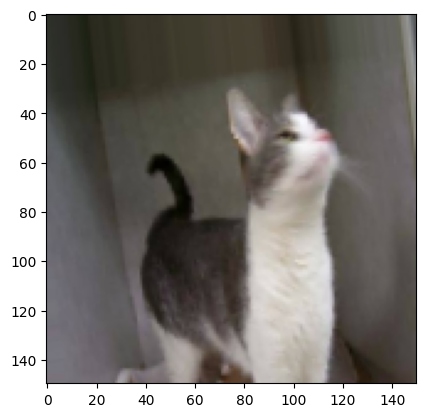

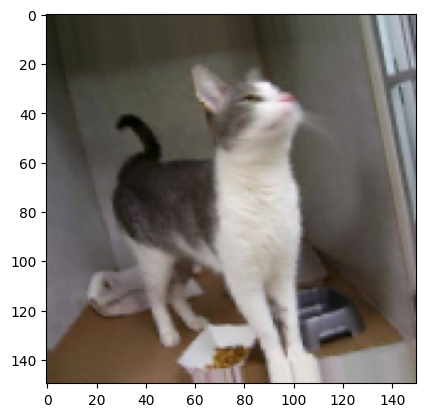

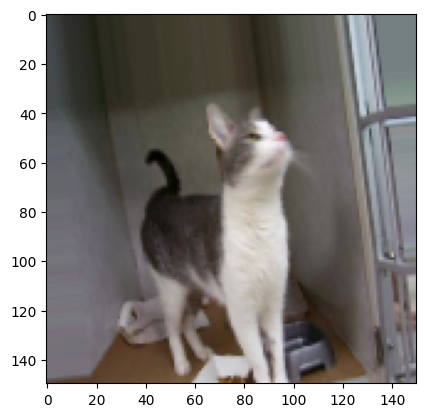

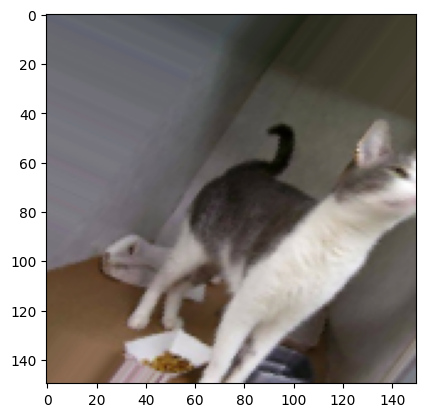

In [16]:
# Lets see the image augmentaion
from tensorflow.keras.preprocessing import image
img = image.load_img(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[1]), target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [17]:
from keras.utils import plot_model
#plot_model(conv_base)

# Your Turn
### Build and optimize another model. Use weights from a different pretrained network (ie, ResNet, Inception, etc. not VGG. https://keras.io/applications/) from the Keras library. Optimize the model by adding additional layers, regularization, change activaction, adjust data augmentation etc.

## RESNET50 Model

### Import additional libraries

In [18]:
import pandas as pd
from keras.applications.mobilenet_v2 import preprocess_input


### DataGenerator

In [19]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

### Creating different dataframes for generator

In [20]:
# create two lists to append file path and category
train_file_path = []
train_category = []

#create a loop to append files name from two sub categories
for root,dir,files in os.walk(train_dir):
    for file in files:
        # condition only when it is a image I will append
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # this is to get the full img path
            train_file_path.append(os.path.join(root,file))
            # this is to add the category name as cats or dogs(the subfolder name)
            train_category.append(os.path.basename(root))
        else:
            continue
# create a dataframe structure with this two
df_train = pd.DataFrame({'train_file_path': train_file_path, 'train_category': train_category})
pd.set_option('display.max_colwidth', None)
df_train.head()
            

,train_file_path,train_category
0,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.775.jpg,dogs
1,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.761.jpg,dogs
2,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.991.jpg,dogs
3,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.749.jpg,dogs
4,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/train/dogs/dog.985.jpg,dogs


In [21]:
# create two lists to append file path and category
val_file_path = []
val_category = []

#create a loop to append files name from two sub categories
for root,dir,files in os.walk(validation_dir):
    for file in files:
        # condition only when it is a image I will append
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # this is to get the full img path
            val_file_path.append(os.path.join(root,file))
            # this is to add the category name as cats or dogs(the subfolder name)
            val_category.append(os.path.basename(root))
        else:
            continue
# create a dataframe structure with this two
df_val = pd.DataFrame({'val_file_path': val_file_path, 'val_category': val_category})
pd.set_option('display.max_colwidth', None)
df_val.head()
            

,val_file_path,val_category
0,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1035.jpg,dogs
1,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1021.jpg,dogs
2,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1009.jpg,dogs
3,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1237.jpg,dogs
4,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/validation/dogs/dog.1223.jpg,dogs


In [22]:
# create two lists to append file path and category
test_file_path = []
test_category = []

#create a loop to append files name from two sub categories
for root,dir,files in os.walk(test_dir):
    for file in files:
        # condition only when it is a image I will append
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # this is to get the full img path
            test_file_path.append(os.path.join(root,file))
            # this is to add the category name as cats or dogs(the subfolder name)
            test_category.append(os.path.basename(root))
        else:
            continue
# create a dataframe structure with this two
df_test = pd.DataFrame({'test_file_path': test_file_path, 'test_category': test_category})
pd.set_option('display.max_colwidth', None)
df_test.head()

,test_file_path,test_category
0,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1753.jpg,dogs
1,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1747.jpg,dogs
2,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1790.jpg,dogs
3,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1948.jpg,dogs
4,/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/dogs vs cats_small/test/dogs/dog.1784.jpg,dogs


### Creating Generators

In [23]:
res_train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory= None,  # Set to None if filenames contain full paths
    x_col="train_file_path",
    y_col="train_category",
 # The directory where the train data is located
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels. This is important because it makes sure all images are the same size.
    batch_size=20, # We will take images in batches of 20.
    class_mode='categorical',
    shuffle = True) # The classification is binary.

res_validataion_generator = train_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory= None,  # Set to None if filenames contain full paths
    x_col="val_file_path",
    y_col="val_category",
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle = False)

res_test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory= None,  # Set to None if filenames contain full paths
    x_col="test_file_path",
    y_col="test_category",
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 2000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


### Import model and build tuned model

In [30]:
from keras.applications import ResNet50
from keras.optimizers import SGD, Adam
res_base_model = ResNet50(weights='imagenet', include_top = False, pooling= 'max',) #input_shape = (150, 150, 3))
#res_base_model.trainable = False
#res_base_model.layers[0].trainable = True
#for layer in res_base_model.layers[:-30]:
#  layer.trainable = False
#for layer in res_base_model.layers:
#  print(layer, layer.trainable)

def resnet50_train():
  backend.clear_session()
  resnet50_train = models.Sequential()
  resnet50_train.add(res_base_model)
  resnet50_train.add(layers.Flatten())
  #resnet50_train.add(layers.GlobalAveragePooling2D())
  resnet50_train.add(layers.Dense(512, activation = 'relu'))
  resnet50_train.add(layers.Dropout(0.5))
  #resnet50_train.add(layers.BatchNormalization())
  #resnet50_train.add(layers.Dense(256, activation = 'relu'))
  #esnet50_train.add(layers.Dense(128, activation = 'relu'))
  resnet50_train.add(layers.Dense(2, activation = 'softmax'))
  resnet50_train.layers[0].trainable = True


  resnet50_train.compile(optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

  return resnet50_train

In [25]:
#res_base_model.summary()

In [31]:
resnet50_train().summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 24,584,706 (93.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [32]:
model1 = resnet50_train()

In [33]:
from keras import callbacks

### Run Model

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.7427 - loss: 5.3054

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 842ms/step - accuracy: 0.7436 - loss: 5.2712 - val_accuracy: 0.4830 - val_loss: 0.7084 - learning_rate: 0.0100
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9535 - loss: 0.1346
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 822ms/step - accuracy: 0.9534 - loss: 0.1346 - val_accuracy: 0.5000 - val_loss: 0.9336 - learning_rate: 0.0100
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.9853 - loss: 0.0503
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009000000078231095.
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 835ms/step - accuracy: 0.9853 - loss: 0.0503 - val_accuracy: 0.5030 - val_loss: 0.9420 - learning_rate: 0.0030
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.9931 - loss: 0.0256
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00026999999536201356.
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 828ms/step - accuracy: 0.9931 - loss: 0.02

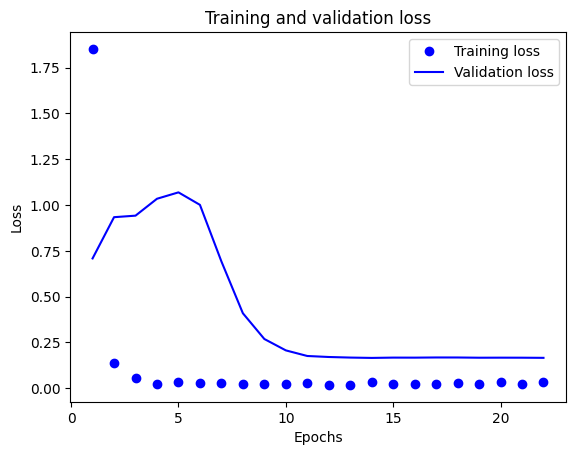

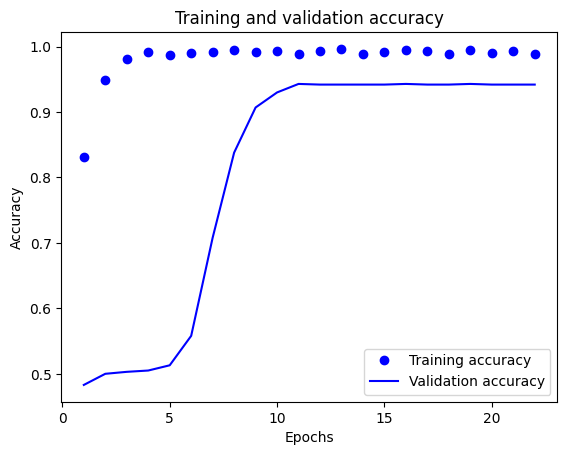

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.9447 - loss: 0.1450
test_acc: 0.9419999718666077


In [ ]:
earlystopper = EarlyStopping(patience=8, verbose=1)
#checkpointer = callbacks.ModelCheckpoint(filepath = '/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/best_results_week_5/{epoch:02d}-{val_loss:.3f}.h5',verbose=1,save_best_only=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=1, min_lr=0.00001, verbose=1,)
history = model1.fit(
    res_train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=res_validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[earlystopper, reduce_lr])


plot_history()

test_loss, test_acc = model1.evaluate(res_test_generator, steps = 50)
print('test_acc:', test_acc)

model1.save('cats_and_dogs_resnet_best.h5')

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 886ms/step - accuracy: 0.6420 - loss: 6.1513 - val_accuracy: 0.5000 - val_loss: 0.6973 - learning_rate: 0.0100
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.8267 - loss: 0.3728
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 881ms/step - accuracy: 0.8268 - loss: 0.3727 - val_accuracy: 0.5000 - val_loss: 0.7095 - learning_rate: 0.0100
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9023 - loss: 0.2383
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009000000078231095.
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 884ms/step - accuracy: 0.9022 - loss: 0.2382 - val_accuracy: 0.5000 - val_loss: 0.7608 - learning_rate: 0.0030
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.9218 - loss: 0.1929
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00026999999536201356.
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 900ms/step - accuracy: 0.9218 -

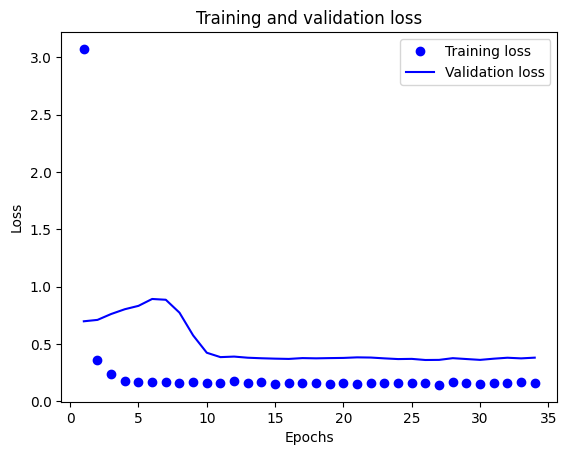

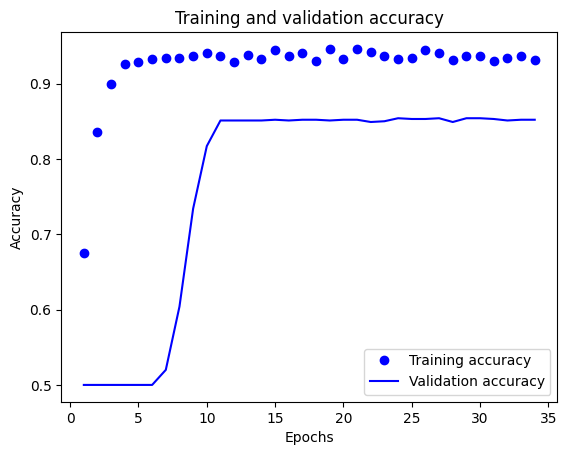

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.8374 - loss: 0.4950


test_acc: 0.8410000205039978


In [34]:
earlystopper = EarlyStopping(patience=8, verbose=1)
#checkpointer = callbacks.ModelCheckpoint(filepath = '/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_682/week_5_assignments/best_results_week_5/{epoch:02d}-{val_loss:.3f}.h5',verbose=1,save_best_only=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=1, min_lr=0.00001, verbose=1,)
history = model1.fit(
    res_train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=res_validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[earlystopper, reduce_lr])


plot_history()

test_loss, test_acc = model1.evaluate(res_test_generator, steps = 50)
print('test_acc:', test_acc)

model1.save('cats_and_dogs_resnet_best.h5')

## Summary 

This week I get to spend more time playing with RESNET model and doing some tuning for the model. It did not start well enough. First I just copied the similar structure from VGG16 to see how RESNET performs. Then I got stuck to the $\color{orange}{\text{0.500}}$ problem.

Initially, I thought it was the callbacks. So I take them all off and add them back one by one. It was not the problem.

Then I thought it might due to binary issue as it could be obvious binary may not be compatible with RESNET. I looked up online, seeing people were transforming the data to categorical data problems by creating dataframe and flow images from data frames with categories names. I did something similar. 

It did not solve the ultimate problem. Then I gradually modified everything, from adding more layers, changing the model trainable parts, removing flatten layers ,etc.. At the end I found a post on GitHub people mentioning how rescale does not fit well with pretrained models, i went on chatGpt to confirm it and it suggests the same thing. Therefore I changed recale to preprocess input from keras. It eventually started gaining accuracies after 4 layers and finally exceeds 0.9. The whole tuning thing took forever to deal with. 

Two more thing about this model: 
1. I should set the learning rate to 0.00001 when I saw how much accuracy it improves when learning rate goes down to 0.0000243. But I do not want to run this model again. It takes litereally forever.
2. should have set the patience to 3 or 4 instead of 8. 

Finally, I am pretty satisfeid with my final test result of $\color{orange}{\text{0.9420}}$.